In [1]:
from sklearn.datasets import fetch_20newsgroups
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from collections import defaultdict,Counter

In [2]:


def twenty_newsgroup_to_csv():
    newsgroups_train = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

    df = pd.DataFrame([newsgroups_train.data, newsgroups_train.target.tolist()]).T
    df.columns = ['text', 'target']

    targets = pd.DataFrame( newsgroups_train.target_names)
    targets.columns=['title']

    out = pd.merge(df, targets, left_on='target', right_index=True)
    out['date'] = pd.to_datetime('now')
    out.to_csv('20_newsgroup.csv')

twenty_newsgroup_to_csv()

C:\Users\carlo\.conda\envs\prueba_PB\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


In [3]:
data = pd.read_csv('20_newsgroup.csv', index_col = 0)
# Select only 5 classes
class_mask = data["target"].isin([7,9,13,18,19])
data = data[class_mask]
data.head(10)

,text,target,title,date
9,\nIf a Christian means someone who believes in...,19,talk.religion.misc,2022-04-08 16:48:22.798245
10,the blood of the lamb.\n\nThis will be a hard ...,19,talk.religion.misc,2022-04-08 16:48:22.798245
12,930418\n\nDo what thou wilt shall be the whole...,19,talk.religion.misc,2022-04-08 16:48:22.798245
40,\n\nNo. Zeno's paradox is resolved by showing...,19,talk.religion.misc,2022-04-08 16:48:22.798245
58,"\nDefinitely, J.R. ""Bob"" Dobbs, numero uno, to...",19,talk.religion.misc,2022-04-08 16:48:22.798245
74,\n\nConvenient? It seems very appropriate tha...,19,talk.religion.misc,2022-04-08 16:48:22.798245
91,NaN,19,talk.religion.misc,2022-04-08 16:48:22.798245
104,NaN,19,talk.religion.misc,2022-04-08 16:48:22.798245
189,"\n\nBrian K., I am pleased with your honesty. ...",19,talk.religion.misc,2022-04-08 16:48:22.798245
194,}>}(a) out of context;\n}>Must have missed whe...,19,talk.religion.misc,2022-04-08 16:48:22.798245


In [4]:
data.shape

(4377, 4)

In [5]:
data = data[data['text'].notna()]

In [6]:
data.shape

(4254, 4)

In [7]:
data.head(10)

,text,target,title,date
9,\nIf a Christian means someone who believes in...,19,talk.religion.misc,2022-04-08 16:48:22.798245
10,the blood of the lamb.\n\nThis will be a hard ...,19,talk.religion.misc,2022-04-08 16:48:22.798245
12,930418\n\nDo what thou wilt shall be the whole...,19,talk.religion.misc,2022-04-08 16:48:22.798245
40,\n\nNo. Zeno's paradox is resolved by showing...,19,talk.religion.misc,2022-04-08 16:48:22.798245
58,"\nDefinitely, J.R. ""Bob"" Dobbs, numero uno, to...",19,talk.religion.misc,2022-04-08 16:48:22.798245
74,\n\nConvenient? It seems very appropriate tha...,19,talk.religion.misc,2022-04-08 16:48:22.798245
189,"\n\nBrian K., I am pleased with your honesty. ...",19,talk.religion.misc,2022-04-08 16:48:22.798245
194,}>}(a) out of context;\n}>Must have missed whe...,19,talk.religion.misc,2022-04-08 16:48:22.798245
200,"\nJesus did and so do I.\n\nPeace be with you,",19,talk.religion.misc,2022-04-08 16:48:22.798245
275,"\nSuperficially a good answer, but it isn't th...",19,talk.religion.misc,2022-04-08 16:48:22.798245


In [8]:
data.groupby('target').describe()

text                                                                 \
       count unique                                                top freq   
target                                                                        
7        947    941                                                 \n    5   
9        966    962                                                 \n    5   
13       967    962  Recently I've come upon a body of literature w...    2   
18       765    760                                                 \n    5   
19       609    607  There are actually a few important things we c...    2   

       title                                  date         \
       count unique                 top freq count unique   
target                                                      
7        947      1           rec.autos  947   947      1   
9        966      1  rec.sport.baseball  966   966      1   
13       967      1             sci.med  967   967      1   
18       765      1  talk.politics.misc  765   765      1   
19       609      1  talk.religion.misc  609   609      1   

                                         
                               top freq  
target                                   
7       2022-04-08 16:48:22.798245  947  
9       2022-04-08 16:48:22.798245  966  
13      2022-04-08 16:48:22.798245  967  
18      2022-04-08 16:48:22.798245  765  
19      2022-04-08 16:48:22.798245  609

# Exploratory Data Analysis

In [9]:
# count how many tweets of each class there are
class_df = data.groupby(['target','title']).count()['text'].reset_index().sort_values(by='text',ascending=False)
class_df.style.background_gradient(cmap='winter')

,target,title,text
2,13,sci.med,967
1,9,rec.sport.baseball,966
0,7,rec.autos,947
3,18,talk.politics.misc,765
4,19,talk.religion.misc,609


We have 967 texts talking about medicine, 966 about baseball, 947 about autos, 765 about politics and 609 about religion.

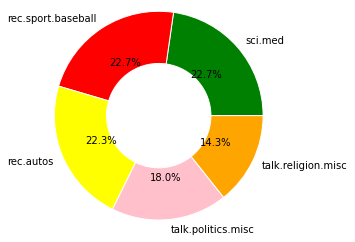

In [10]:
#let's create a pie chart to visualize the distribution of the classes
percent_class=class_df.text
labels= class_df.title

colors = ['green','red','yellow','pink','orange']

my_pie,_,_ = plt.pie(percent_class,radius = 1.2,labels=labels,colors=colors,autopct="%.1f%%")

plt.setp(my_pie, width=0.6, edgecolor='white') 
plt.savefig('pie.png')
plt.show()

Now, we will add a column to know the length of each tweet

In [11]:
data['message_len'] = data.text.apply(len)
data.head()

,text,target,title,date,message_len
9,\nIf a Christian means someone who believes in...,19,talk.religion.misc,2022-04-08 16:48:22.798245,417
10,the blood of the lamb.\n\nThis will be a hard ...,19,talk.religion.misc,2022-04-08 16:48:22.798245,225
12,930418\n\nDo what thou wilt shall be the whole...,19,talk.religion.misc,2022-04-08 16:48:22.798245,6974
40,\n\nNo. Zeno's paradox is resolved by showing...,19,talk.religion.misc,2022-04-08 16:48:22.798245,683
58,"\nDefinitely, J.R. ""Bob"" Dobbs, numero uno, to...",19,talk.religion.misc,2022-04-08 16:48:22.798245,325


Now, we are going to compare the length of the tweets depending on the class they belong to

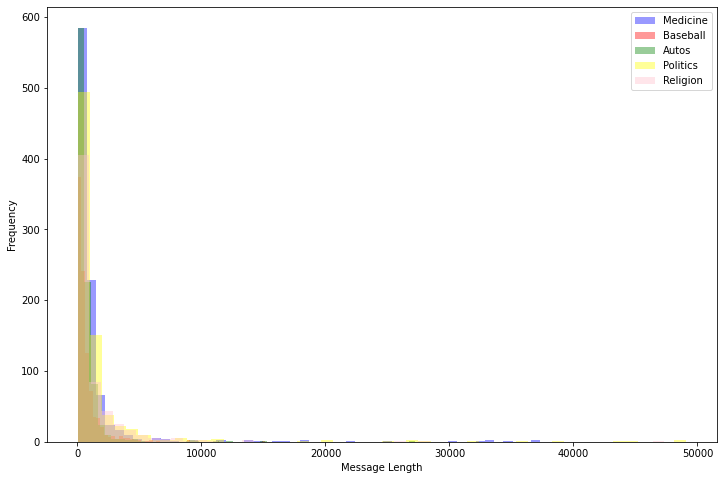

In [12]:
plt.figure(figsize=(12, 8))

data[data['title']=='sci.med'].message_len.plot(bins=50, kind='hist', color='blue', label='Medicine', alpha=0.4)
data[data['title']=='rec.sport.baseball'].message_len.plot(bins=50,kind='hist', color='red', label='Baseball', alpha=0.4)
data[data['title']=='rec.autos'].message_len.plot(bins=50,kind='hist', color='green', label='Autos', alpha=0.4)
data[data['title']=='talk.politics.misc'].message_len.plot(bins=50,kind='hist', color='yellow', label='Politics', alpha=0.4)
data[data['title']=='talk.religion.misc'].message_len.plot(bins=50,kind='hist', color='pink', label='Religion', alpha=0.4)
plt.legend()
plt.xlabel("Message Length")
plt.savefig('length.png')
plt.show()



As we can observe, all the texts have similar length without depending on the class they belong to.

Now, let's create a corpus with our texts.


In [13]:
def create_corpus(target):
    corpus=[]
    
    for x in data[data['target']==target ]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

In [14]:
stop=set(stopwords.words('english'))



Now, let's see which are the words that appear more frequently in each class


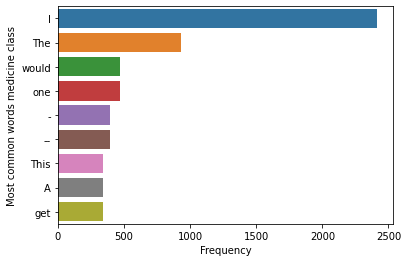

In [15]:
# Medicine class

corpus = create_corpus(13)
counter=Counter(corpus)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:60]:
    if (word not in stop) :
        x.append(word)
        y.append(count)
ax = sns.barplot(x=y,y=x)
ax.set(xlabel="Frequency", ylabel = "Most common words medicine class")
plt.savefig('words_medicine.png')


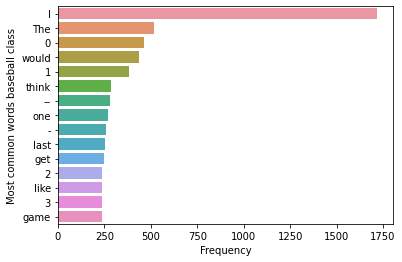

In [16]:
# Baseball class

corpus = create_corpus(9)
counter=Counter(corpus)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:60]:
    if (word not in stop) :
        x.append(word)
        y.append(count)
ax = sns.barplot(x=y,y=x)
ax.set(xlabel="Frequency", ylabel = "Most common words baseball class")
plt.savefig('words_baseball.png')

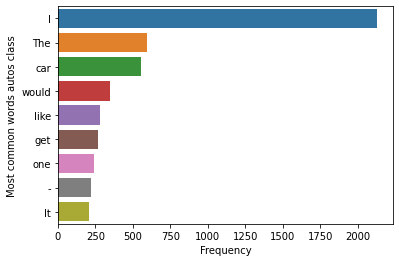

In [17]:
# Autos class

corpus = create_corpus(7)
counter=Counter(corpus)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:60]:
    if (word not in stop) :
        x.append(word)
        y.append(count)
ax = sns.barplot(x=y,y=x)
ax.set(xlabel="Frequency", ylabel = "Most common words autos class")
plt.savefig('words_autos.png')

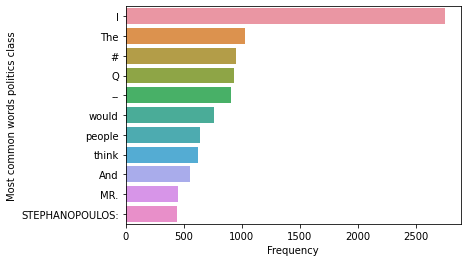

In [18]:
# Politics class

corpus = create_corpus(18)
counter=Counter(corpus)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:60]:
    if (word not in stop) :
        x.append(word)
        y.append(count)
ax = sns.barplot(x=y,y=x)
ax.set(xlabel="Frequency", ylabel = "Most common words politics class")
plt.savefig('words_politics.png')

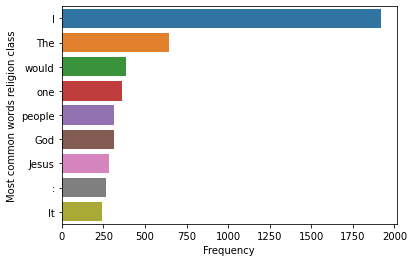

In [19]:
# Religion class

corpus = create_corpus(19)
counter=Counter(corpus)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:60]:
    if (word not in stop) :
        x.append(word)
        y.append(count)
ax = sns.barplot(x=y,y=x)
ax.set(xlabel="Frequency", ylabel = "Most common words religion class")
plt.savefig('words_religion.png')